## Deep Learning CSCE 636 Homework 1

**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2627 - accuracy: 0.9237
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1071 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0700 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0505 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0378 - accuracy: 0.9887


**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 78ms/step


array([1.6402950e-08, 3.6360919e-09, 2.6284611e-06, 9.3211211e-06,
       2.4443958e-12, 1.9568805e-08, 8.3959456e-13, 9.9998802e-01,
       1.8851505e-08, 2.8926886e-08], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.999988

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0752 - accuracy: 0.9777
test_acc: 0.9776999950408936


## Question 1

In [ ]:
def train_NeuralNetwork(first_layer_size,train_images,test_images,train_labels,test_labels):

    model = keras.Sequential([
        layers.Dense(first_layer_size, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    model.fit(train_images, train_labels, epochs=5, batch_size=128)


    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"test_acc: {test_acc}")
    return test_acc


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

first_layer_size = [16,32,64,128,256,512]
accuracy = []


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

for size in first_layer_size:
    test_acc = train_NeuralNetwork(size, train_images,test_images,train_labels,test_labels)
    accuracy.append(test_acc)
print(accuracy)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5866 - accuracy: 0.8418
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2912 - accuracy: 0.9175
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2540 - accuracy: 0.9281
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2319 - accuracy: 0.9348
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2111 - accuracy: 0.9378
test_acc: 0.9377999901771545
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4664 - accuracy: 0.8753
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.9276
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2074 - accuracy: 0.9412
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1750 - accuracy: 0.9504
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1501 

## Plot for First Question

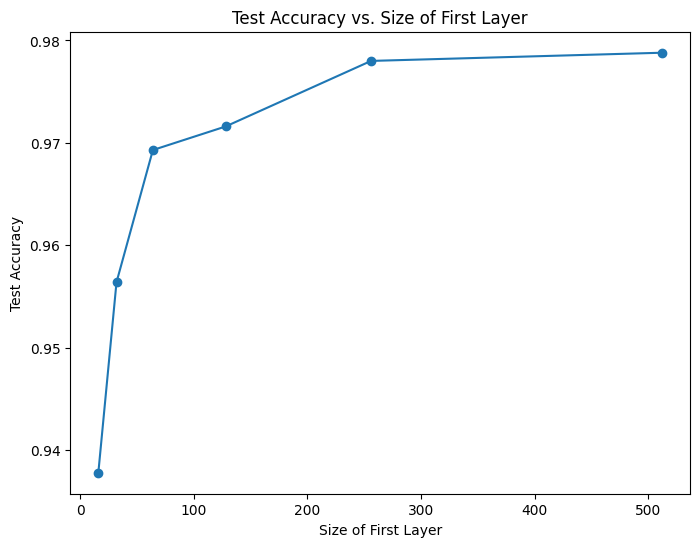

In [ ]:
import matplotlib.pyplot as plt
# Create the figure
plt.figure(figsize=(8, 6))

# Plot the data
plt.plot(first_layer_size, accuracy, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Size of First Layer')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Size of First Layer')

# Show the plot
plt.show()

## Question 2

In [ ]:
def train_NeuralNetwork(number_of_layers,train_images,test_images,train_labels,test_labels):

    model = keras.Sequential()
    for i in range(number_of_layers):
          model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))

    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    model.fit(train_images, train_labels, epochs=5, batch_size=128)

    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"test_acc: {test_acc}")
    return test_acc


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

number_of_layers = [2,3,4,5]
accuracy = []

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

for number in number_of_layers:
    test_acc = train_NeuralNetwork(number, train_images,test_images,train_labels,test_labels)
    accuracy.append(test_acc)
print(accuracy)

Epoch 1/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2301 - accuracy: 0.9290
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0844 - accuracy: 0.9740
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0547 - accuracy: 0.9833
Epoch 4/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0375 - accuracy: 0.9876
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0664 - accuracy: 0.9819
test_acc: 0.9818999767303467
Epoch 1/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2450 - accuracy: 0.9237
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 0.0866 - accuracy: 0.9733
Epoch 3/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0563 - accuracy: 0.9821
Epoch 4/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0405 - accuracy: 0.9871
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - 

## Plot for Second Question

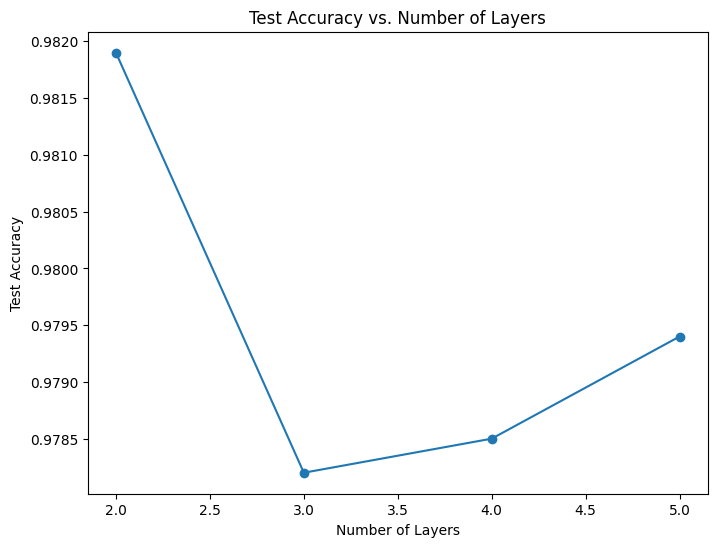

In [ ]:
import matplotlib.pyplot as plt
# Create the figure
plt.figure(figsize=(8, 6))

# Plot the data
plt.plot(number_of_layers, accuracy, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Number of Layers')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Layers')

# Show the plot
plt.show()